In [26]:
import numpy as np
import pandas as pd
from fbprophet import Prophet # Prophet 대문자 시작..

In [27]:
import pystan

data from
https://www.kaggle.com/neuromusic/avocado-prices

In [28]:
df=pd.read_csv('avocado.csv')

print(df.shape)
df.head()

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


4046/4225/4770 은 아보카도 종류에 따른 판매량, Total Volume은 총 판매량

우리가 필요한건 Date와 AveragePrice

In [29]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


conventional type avocado와 organic type avocado(유기농)가 있다.

conventional one에 대한 가격 예측을 해보자.

In [30]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [31]:
type(df['Date'][0])

str

In [32]:
df['Date']=pd.to_datetime(df['Date'])
# 'Date'col의 entry가 str이므로 pd.datetime 형태로 변환

df1=df.loc[(df.type=='conventional')&(df.region=='TotalUS')]
# df에서 필요한 값을 가진 data만 가져온다  *매우 자주 사용하는 기능
data1=df1[['Date','AveragePrice']].reset_index(drop=True)
# df에서 필요한 col만 가져온 후 reset_index  *매우 자주 사용하는 기능

data1=data1.rename(columns={'Date':'ds', 'AveragePrice':'y'})  # col name을 변경
data1.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<AxesSubplot:xlabel='ds'>

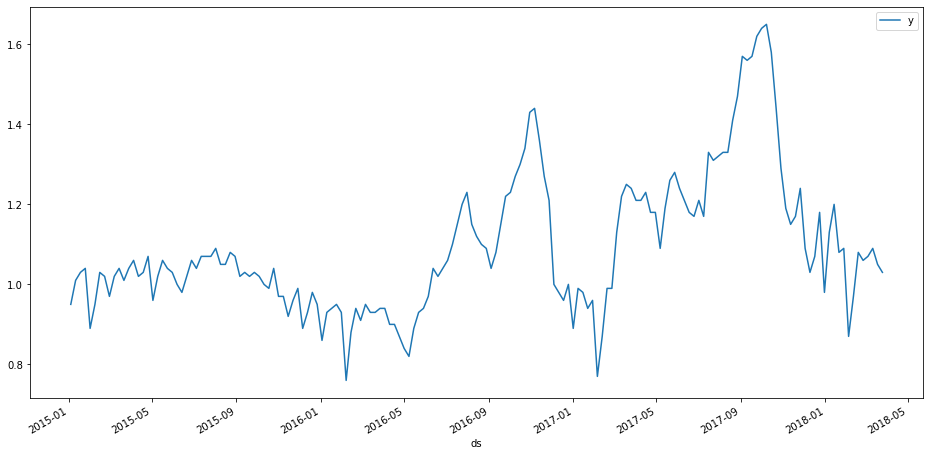

In [33]:
data1.plot(x='ds', y='y', figsize=(16,8))

미국전체시장(TotalUS)의 Conventional Avocado의 판매량의 시각화

2017.09에 판매량 최고치임을 확인 가능

In [34]:
model=Prophet()

model.fit(data1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future=model.make_future_dataframe(periods=365)  # fit 시켜 예측한 데이터를 데이터프레임으로

forecast=model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.171972,0.973566,1.239902,1.104647,1.232824,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,0.0,0.0,0.0,1.112634
530,2019-03-22,1.171861,0.988380,1.236667,1.104237,1.232723,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,0.0,0.0,0.0,1.113933
531,2019-03-23,1.171750,0.982379,1.247317,1.103690,1.233046,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,0.0,0.0,0.0,1.115706
532,2019-03-24,1.171640,0.988086,1.236564,1.103173,1.233238,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,0.0,0.0,0.0,1.117936
533,2019-03-25,1.171529,0.989426,1.247150,1.102741,1.233307,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,0.0,0.0,0.0,1.120593


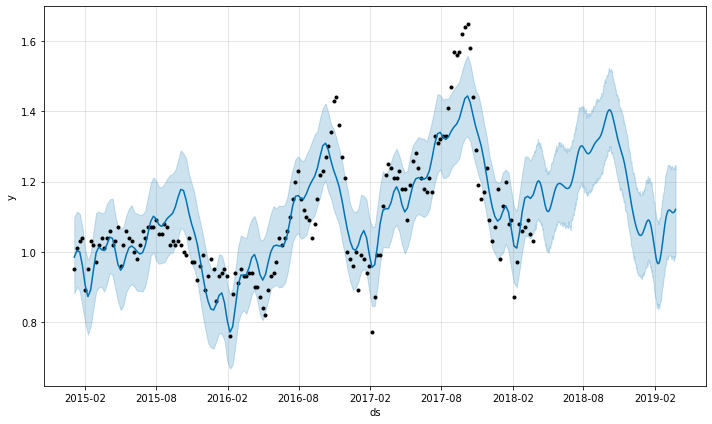

In [37]:
fig1_1=model.plot(forecast)

점(.)은 실제 data

그래프는 예측 data(향 후 1년)

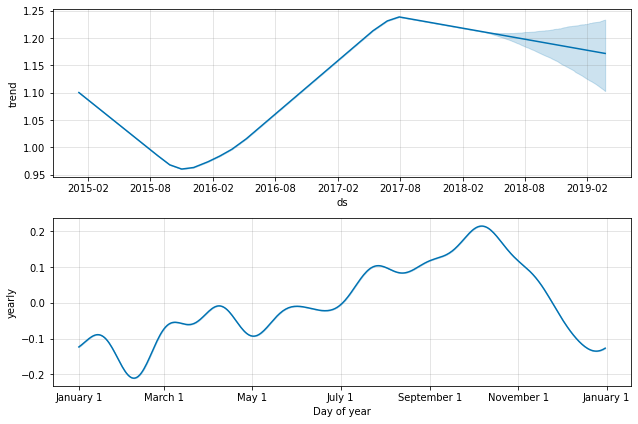

In [38]:
fig1_2=model.plot_components(forecast)

어떤 요소가 아보카도 Average Price에 영향을 미쳤는지 분석한 결과를 출력
> 시기별 가격 추세와 연간 트렌드

## 위와 같은 방식으로 Organic Avocado에 대한 가격예측

In [43]:
df2=df.loc[(df.type=='organic')&(df.region=='TotalUS')]
data2=df2[['Date','AveragePrice']].reset_index(drop=True)

data2=data2.rename(columns={'Date':'ds', 'AveragePrice':'y'})
data2.head(10)

,ds,y
0,2015-12-27,1.52
1,2015-12-20,1.53
2,2015-12-13,1.43
3,2015-12-06,1.52
4,2015-11-29,1.50
5,2015-11-22,1.49
6,2015-11-15,1.60
7,2015-11-08,1.54
8,2015-11-01,1.47
9,2015-10-25,1.62


<AxesSubplot:xlabel='ds'>

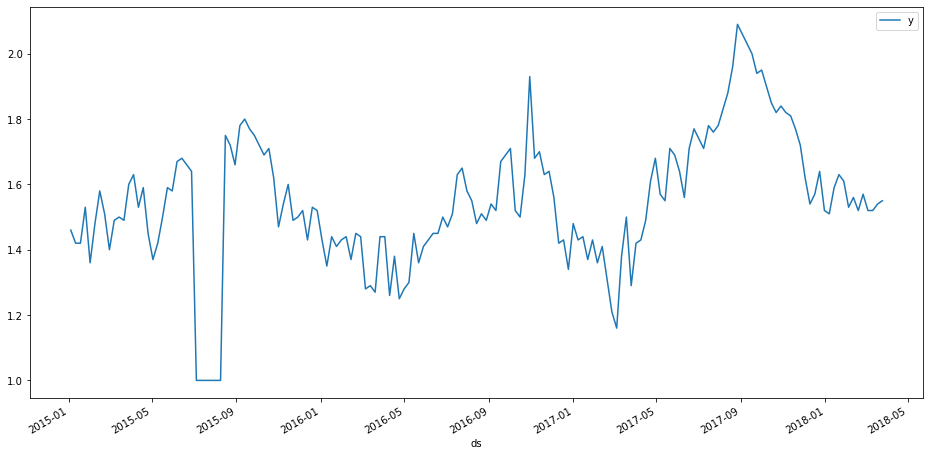

In [42]:
data2.plot(x='ds', y='y', figsize=(16,8))

In [62]:
data2['y'].describe()

count    169.000000
mean       1.546036
std        0.202764
min        1.000000
25%        1.430000
50%        1.530000
75%        1.670000
max        2.090000
Name: y, dtype: float64

In [65]:
data2[data2['y']==data2['y'].min()].count()

ds    6
y     6
dtype: int64

Organic Avocado는 Conventional Avocado와 다른 가격 변동을 보인다.

2015년 3분기에 매우 낮은가격에서 가격이 유지됨을 확인할 수 있다.(이상치로 의심)

Conventional Avocado와 동일하게 2017년 하반기에 최고가를 찍었음을 확인할 수 있다.

In [54]:
model=Prophet()

model.fit(data2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future=model.make_future_dataframe(periods=365)  # fit 시켜 예측한 데이터를 데이터프레임으로

forecast=model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.913354,1.603078,1.968367,1.893603,1.935081,-0.135410,-0.135410,-0.135410,-0.135410,-0.135410,-0.135410,0.0,0.0,0.0,1.777943
530,2019-03-22,1.913808,1.612513,1.967239,1.893902,1.935574,-0.127971,-0.127971,-0.127971,-0.127971,-0.127971,-0.127971,0.0,0.0,0.0,1.785837
531,2019-03-23,1.914262,1.615344,1.957534,1.894283,1.936037,-0.120420,-0.120420,-0.120420,-0.120420,-0.120420,-0.120420,0.0,0.0,0.0,1.793842
532,2019-03-24,1.914716,1.628311,1.984119,1.894678,1.936500,-0.112859,-0.112859,-0.112859,-0.112859,-0.112859,-0.112859,0.0,0.0,0.0,1.801857
533,2019-03-25,1.915170,1.626254,1.983592,1.895073,1.936963,-0.105388,-0.105388,-0.105388,-0.105388,-0.105388,-0.105388,0.0,0.0,0.0,1.809782


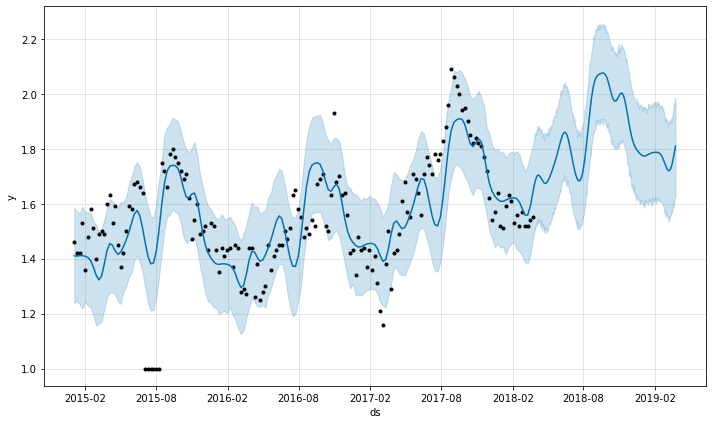

In [56]:
fig2_1=model.plot(forecast)

> 위에서 가격 최저점이 유지된 시기를 예측모델에서는 이상치로 판별하였음을 확인.

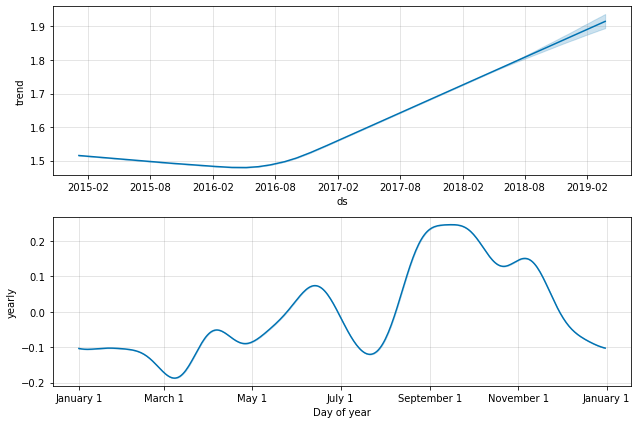

In [57]:
fig2_2=model.plot_components(forecast)

Organic Avocado는 시간이 지남에 따라 가격이 증가하는 추세를 보임을 확인가능.